# FLight Maps
## This script is a demo of the various tools available in Python for plotting flight data

## Part 1: Import packages and read in data 

%matplotlib qt places all plots in pop-up windows. These windows have zoom, pan and other usefull features that also work on 3D plots. This is called later on for 3D plots, but to use it for all plots, just uncomment the line below.

In [1]:
 #%matplotlib qt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

Read in both files as tables using pandas (both csv and json files are used)

In [2]:
csvData = pd.read_csv("C:/Users/Daniel/OneDrive/Documents/OneDrive/Documents/Python Scripts/WFH documents/flight_maps/sample_flight_sim.csv")
jsonData = pd.read_json('C:/Users/Daniel/OneDrive/Documents/OneDrive/Documents/Python Scripts/WFH documents/flight_maps/n4023f_stamprun.json');

## Part 2: Quick look at the data

Print the headers and first few lines of both tables

In [3]:
csvData.head(3)

,Time,Longitude,Latitude,Altitude,Roll,Pitch,Heading
0,56.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063
1,57.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063
2,58.1667,-157.943156,21.325247,23.924636,-0.050059,-0.231505,89.869063


In [4]:
jsonData.head(3)

,Altitude,Course,Latitude,Longitude,Speed,Timestamp
0,136.811028,0.0,38.315401,-76.553887,0.000000,2020-02-15 17:23:39.164
1,136.811028,336.2,38.315401,-76.553887,3.599989,2020-02-15 17:23:39.168
2,136.811028,336.2,38.315401,-76.553887,3.599989,2020-02-15 17:23:39.366


Plot a quick look plot of the flight path coordinates

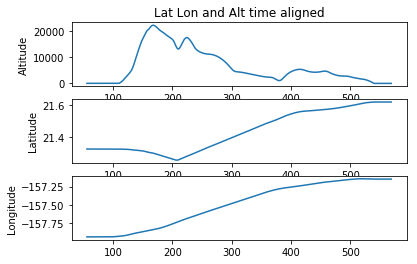

In [5]:
plt.figure()
plt.subplot(311)
plt.plot(csvData.Time,csvData.Altitude)
plt.ylabel('Altitude')
plt.title('Lat Lon and Alt time aligned')
plt.subplot(312)
plt.plot(csvData.Time,csvData.Latitude)
plt.ylabel('Latitude')
plt.subplot(313)
plt.plot(csvData.Time,csvData.Longitude)
plt.ylabel('Longitude');
plt.savefig('AltLatLon.png')

Demo the basemap toolkit's ablity to plot high quality maps based on latitude and longitude coordinates

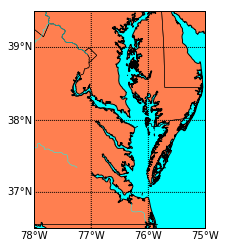

In [42]:
plt.figure()
map = Basemap(projection = 'merc',lat_0 = 38,lon_0 = -76.5,
                resolution = 'h',area_thresh = 0.1,
               llcrnrlon = -78,llcrnrlat = 36.5,
               urcrnrlon = -75,urcrnrlat = 39.5)

map.drawmeridians(range(0,360,1),labels=[1,0,0,1])
map.drawparallels(range(-90,90,1),labels=[1,0,0,1])
map.drawcoastlines()
map.drawstates()
map.drawrivers(color='aqua')
map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral',lake_color = 'aqua')
plt.savefig('Chesapeak.png')

Plot latitude and longitude

Text(0.5,1,'Longitude vs Latitude')

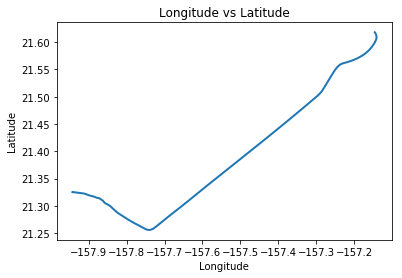

In [7]:
plt.figure()
plt.plot(csvData.Longitude,csvData.Latitude,Linewidth = 2);
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')

## Part 3: Overlay map and plotted flight path

To do this, the data type needs to be an array. So add Lat and Long data as arrays to the table.

In [16]:
long = csvData.Longitude
lat = csvData.Latitude
latArray = np.asarray(lat,dtype=np.float64)
longArray = np.asarray(long,dtype=np.float64)
csvData['longArray']=longArray
csvData['latArray']=latArray

Plot the flight path on the map

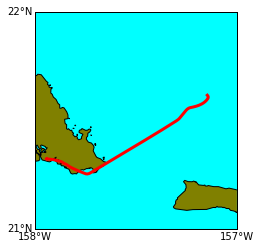

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure()
map = Basemap(projection = 'merc',lat_0 = 21.5,lon_0 = -157.5,
                resolution = 'h',area_thresh = 0.1,
               llcrnrlon = -158,llcrnrlat = 21,
               urcrnrlon = -157,urcrnrlat = 22)

map.drawmeridians(range(0,360,1),labels=[1,0,0,1])
map.drawparallels(range(-90,90,1),labels=[1,0,0,1])
map.drawcoastlines()
map.drawstates()
map.drawrivers(color='aqua')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color = 'olive',lake_color = 'aqua')

x,y = map(longArray,latArray)
map.plot(x,y,linewidth=3,color='r')
plt.show()
plt.savefig('flightmap.png')
# 0.1 degrees ~= 11.1 km ~= 36k ft
# 

## Part 4: 3D data and plotting

Plot the latitude, longitude and altitude in a 3D space
Bring in matplotlib qt to allow for popup windows

In [46]:
%matplotlib qt

Plot the 3D flight path below, note the scaling applied to Altitude. On scales of magnitude there are approximately 10e4 ft ~ 1 degree. Yes I aknowledge this is a little sketch, but it helps give the data a more realistic appearance.

In [68]:
plt.figure()
ax = plt.axes(projection='3d')
#ax.set_xlim3d()
ax.set_zlim3d(0,22500)
ax.plot3D(csvData.Longitude,csvData.Latitude,csvData.Altitude/10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Place a map on the x y plane of a 3D figure